In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [15]:
X_train_full.shape

(60000, 28, 28)

In [16]:
X_train_full.dtype

dtype('uint8')

In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [0]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
class_names[y_train[0]]

'Coat'

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

**OR IN CONSTRUCTOR**

In [0]:
model = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]),
                                  keras.layers.Dense(300, activation="relu"),
                                  keras.layers.Dense(100, activation="relu"),
                                  keras.layers.Dense(10, activation="softmax")
                                ])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


get a model’s list of layers

In [24]:
model.layers

In [0]:
hidden1 = model.layers[1]

In [26]:

hidden1.name


'dense'

In [0]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[ 0.03569192,  0.03432711,  0.03398945, ...,  0.04347679,
        -0.03217759, -0.04565591],
       [ 0.06032102, -0.02134435, -0.03291227, ...,  0.01751913,
         0.03963829, -0.04745428],
       [-0.04984676, -0.01767829, -0.03124498, ..., -0.01163778,
        -0.00465546, -0.03579873],
       ...,
       [ 0.07228811, -0.05955337,  0.06935799, ..., -0.02100444,
        -0.0128582 , -0.05439316],
       [ 0.06117195, -0.05623714, -0.07370482, ..., -0.02839775,
         0.01097345, -0.01250256],
       [ 0.06562868, -0.04896668, -0.05902413, ..., -0.0712807 ,
        -0.02429731,  0.05414468]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7213 - accuracy: 0.7663 - val_loss: 0.5201 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4856 - accuracy: 0.8311 - val_loss: 0.4451 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8454 - val_loss: 0.4108 - val_accuracy: 0.8614
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4135 - accuracy: 0.8560 - val_loss: 0.4111 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3937 - accuracy: 0.8621 - val_loss: 0.3769 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8662 - val_loss: 0.3803 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3640 - accuracy: 0.8714 - val_loss: 0.3625 - val_accuracy:

In [34]:
history

In [35]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [36]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [37]:
history.history

{'accuracy': [0.7662545442581177,
  0.8311454653739929,
  0.8454363346099854,
  0.8559818267822266,
  0.8621090650558472,
  0.8662182092666626,
  0.8713818192481995,
  0.8746181726455688,
  0.8776181936264038,
  0.8814545273780823,
  0.8839091062545776,
  0.8868727087974548,
  0.8899999856948853,
  0.8907091021537781,
  0.8924000263214111,
  0.8961636424064636,
  0.8980000019073486,
  0.8996182084083557,
  0.9014363884925842,
  0.903109073638916,
  0.906036376953125,
  0.9069091081619263,
  0.9086727499961853,
  0.9100909233093262,
  0.9129454493522644,
  0.9137272834777832,
  0.9147090911865234,
  0.9158909320831299,
  0.9186182022094727,
  0.9185636639595032],
 'loss': [0.7212859988212585,
  0.48562875390052795,
  0.44136515259742737,
  0.41352394223213196,
  0.3936704397201538,
  0.3768247067928314,
  0.3640279173851013,
  0.35227009654045105,
  0.34293174743652344,
  0.33256006240844727,
  0.3238166272640228,
  0.31563282012939453,
  0.3080202341079712,
  0.3023988902568817,
  0.29

If you use this dictionary to create a pandas DataFrame and call its plot() method, you get the learning curves 

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt

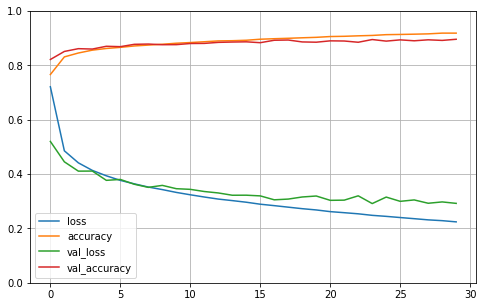

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) 
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left.

**ON TEST**

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.8440 - accuracy: 0.8494


[62.843963623046875, 0.849399983882904]

Using the model to make predictions

In [0]:
X_new = X_test[:3]

In [0]:
y_proba = model.predict(X_new)


In [45]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the pre dict_classes() method instead:

In [46]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [47]:
y_pred

array([9, 2, 1])

In [49]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [0]:
y_new = y_test[:3]

In [51]:
y_new

array([9, 2, 1], dtype=uint8)